In [268]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [47]:
portfolio.shape

(10, 6)

In [48]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [49]:
profile.shape

(17000, 5)

In [50]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [51]:
transcript.shape

(306534, 4)

In [52]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


## Data Cleaning

In [53]:
# checking for NaN values
portfolio_nan = portfolio.isna().sum().sum()
profile_nan = profile.isna().sum().sum()
transcript_nan = transcript.isna().sum().sum()

print("NaN values in portfolio: {}".format(portfolio_nan))
print("NaN values in profile: {}".format(profile_nan))
print("NaN values in transcript: {}".format(transcript_nan))

NaN values in portfolio: 0
NaN values in profile: 4350
NaN values in transcript: 0


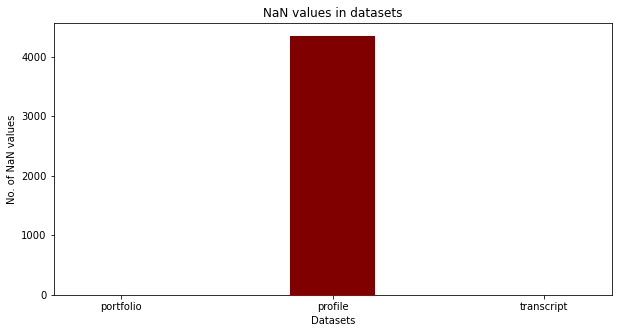

In [265]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'portfolio':portfolio_nan, 'profile':profile_nan, 'transcript':transcript_nan}
dataset = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dataset, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Datasets")
plt.ylabel("No. of NaN values")
plt.title("NaN values in datasets")
plt.show()

In [54]:
# getting number of NaN values in each column
for column_name in profile.columns:
    print (column_name + ": " + str(profile[column_name].isna().sum()))

gender: 2175
age: 0
id: 0
became_member_on: 0
income: 2175


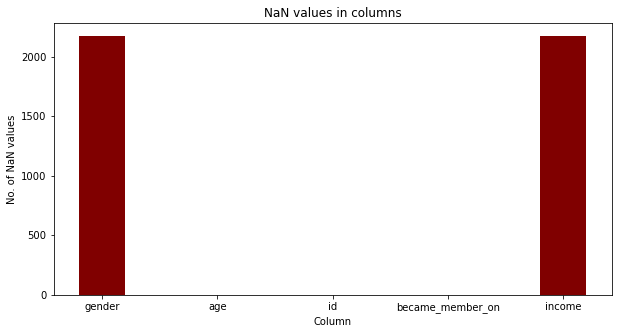

In [269]:
data = {'gender':profile['gender'].isna().sum(), 'age':profile['age'].isna().sum(), 'id':profile['id'].isna().sum(), 
       'became_member_on': profile['became_member_on'].isna().sum(), 'income':profile['income'].isna().sum()}
dataset = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dataset, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Column")
plt.ylabel("No. of NaN values")
plt.title("NaN values in columns")
plt.show()

In [55]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [56]:
profile_nan_df = profile[profile.isna().any(axis=1)]

In [57]:
profile_nan_df.shape

(2175, 5)

In [58]:
profile_nan_df.describe()

,age,became_member_on,income
count,2175.0,2.175000e+03,0.0
mean,118.0,2.016804e+07,NaN
std,0.0,1.009105e+04,NaN
min,118.0,2.013080e+07,NaN
25%,118.0,2.016070e+07,NaN
50%,118.0,2.017073e+07,NaN
75%,118.0,2.017123e+07,NaN
max,118.0,2.018073e+07,NaN


In [59]:
profile_nan_df.age.unique()

array([118], dtype=int64)

In [60]:
profile_nan_df.income.unique()

array([nan])

After investigating the rows with NaN values in the profile dataframe, we can conclude that these entries are erroneous, as they all have the same age of 118, which is way above the average life expectancy, and NaN for the income field. Therefore, we may safely remove these 2175 rows and work with the rest of the data for this dataframe.

In [61]:
# drop rows with NaN values
profile.dropna(inplace = True)

In [62]:
profile.shape

(14825, 5)

In [63]:
profile.isna().sum().sum()

0

In [64]:
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [65]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [66]:
# convert time from number of hours to number of days
transcript['time'] = transcript['time'].div(24).round(2)

In [76]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [79]:
# converting dictionary to series to extract values
transcript_value_df = transcript['value'].apply(pd.Series)

In [82]:
transcript_value_df.shape

(306534, 4)

In [80]:
transcript_value_df.head()

,offer id,amount,offer_id,reward
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [81]:
# getting number of NaN values in each column
for column_name in transcript_value_df.columns:
    print (column_name + ": " + str(transcript_value_df[column_name].isna().sum()))

offer id: 172532
amount: 167581
offer_id: 272955
reward: 272955


In [96]:
# dropping reward column since this information is obtainable from the portfolio dataframe
transcript_value_df.drop(['reward'], axis=1, inplace = True)

In [98]:
# combining non NaN values into one column
transcript_value_df['stacked'] = transcript_value_df.stack().values

In [100]:
# replacing dict column with extracted dict values
transcript['value'] = transcript_value_df['stacked']

In [101]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0


In [102]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

### Model to develop

A model will be developed that will determine whether a particular person with certain attributes will be responsive to certain types of offers. The independent and dependent variables to be used are as follows:

Independent variables = gender, age, income, type of offer

Dependent variable = response to offer (yes/no)

In [124]:
# subset transcript to only transactions relating to offers
transcript_offers = transcript.loc[transcript['event'].isin(['offer received', 'offer viewed', 'offer completed'])]

In [125]:
transcript_offers.value.unique()

array(['9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2906b810c7d4411798c6938adc9daaa5',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '3f207df678b143eea3cee63160fa8bed',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       '5a8bc65990b245e5a138643cd4eb9837'], dtype=object)

In [126]:
transcript_offers.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0


In [127]:
# arrange by person and offer id for easier viewing
transcript_offers = transcript_offers.sort_values(['person', 'value', 'time'])

In [128]:
transcript_offers.drop(['time'], axis=1, inplace = True)

In [129]:
transcript_offers

,person,event,value
247879,0009655768c64bdeb2e877511632db8f,offer received,2906b810c7d4411798c6938adc9daaa5
258884,0009655768c64bdeb2e877511632db8f,offer completed,2906b810c7d4411798c6938adc9daaa5
113605,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed
139992,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed
55972,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837
...,...,...,...
214717,ffff82501cea40309d5fdd7edcca4a07,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9
230690,ffff82501cea40309d5fdd7edcca4a07,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9
1393,ffff82501cea40309d5fdd7edcca4a07,offer received,fafdcd668e3743c1bb461111dcafc2a4
15836,ffff82501cea40309d5fdd7edcca4a07,offer viewed,fafdcd668e3743c1bb461111dcafc2a4


In [130]:
# join event entries so that we can better understand customers' flow with regards to offers

transcript_offers = transcript_offers.groupby(['person','value'])['event'].apply(', '.join).reset_index()

In [131]:
transcript_offers

,person,value,event
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"offer received, offer completed"
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"offer received, offer viewed"
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"offer received, offer viewed"
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"offer received, offer completed, offer viewed"
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"offer received, offer completed, offer viewed"
...,...,...,...
63283,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,"offer received, offer viewed, offer completed,..."
63284,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,"offer received, offer viewed, offer completed"
63285,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,"offer received, offer viewed, offer completed,..."
63286,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,"offer received, offer completed, offer viewed"


In [132]:
transcript_offers.event.dtype

dtype('O')

In [152]:
# convert to list to count number of actions taken by customer for an offer
transcript_offers.event = transcript_offers.event.str.split(",")

In [154]:
transcript_offers['actions taken'] = transcript_offers.event.str.len()

In [155]:
transcript_offers

,person,value,event,actions taken
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer completed]",2
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"[offer received, offer viewed]",2
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"[offer received, offer viewed]",2
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer completed, offer viewed]",3
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"[offer received, offer completed, offer viewed]",3
...,...,...,...,...
63283,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer viewed, offer complet...",6
63284,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,"[offer received, offer viewed, offer completed]",3
63285,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer viewed, offer complet...",9
63286,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[offer received, offer completed, offer viewed]",3


In [156]:
transcript_offers['actions taken'].unique()

array([ 2,  3,  4,  1,  5,  6,  7,  9,  8, 12, 10, 13, 11], dtype=int64)

In [171]:
transcript_offers['actions taken'].value_counts()

2     25219
3     20185
1      8540
4      3721
6      3100
5      1931
9       239
7       168
8       155
12       16
11        7
10        6
13        1
Name: actions taken, dtype: int64

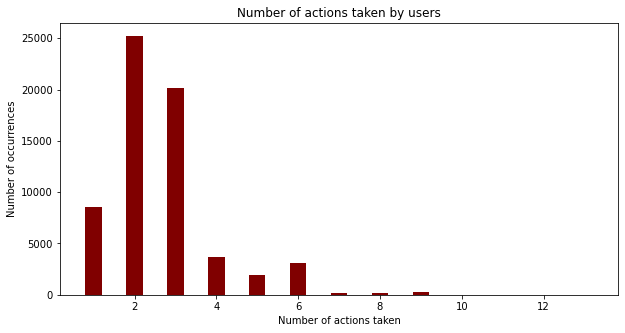

In [273]:
data = transcript_offers['actions taken'].value_counts()
dataset = list(data.index)
values = list(data.values)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dataset, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Number of actions taken")
plt.ylabel("Number of occurrences")
plt.title("Number of actions taken by users")
plt.show()

Some of the transactions are aggregated together but it is okay. What we are concerned about here is the user's behaviour to a particular offer. We deem the user as being responsive to an offer if the user has ever completed both "offer viewed" and "offer completed" steps for an offer.

In [188]:
transcript_offers['offer viewed'] = transcript_offers.event.astype(str).str.contains('offer viewed')

In [189]:
transcript_offers['offer completed'] = transcript_offers.event.astype(str).str.contains('offer completed')

In [195]:
transcript_offers

,person,value,event,actions taken,offer viewed,offer completed,response to offer
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer completed]",2,False,True,False
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"[offer received, offer viewed]",2,True,False,False
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"[offer received, offer viewed]",2,True,False,False
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer completed, offer viewed]",3,True,True,True
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"[offer received, offer completed, offer viewed]",3,True,True,True
...,...,...,...,...,...,...,...
63283,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer viewed, offer complet...",6,True,True,True
63284,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,"[offer received, offer viewed, offer completed]",3,True,True,True
63285,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer viewed, offer complet...",9,True,True,True
63286,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[offer received, offer completed, offer viewed]",3,True,True,True


In [191]:
transcript_offers['offer viewed'].value_counts()

True     49135
False    14153
Name: offer viewed, dtype: int64

In [192]:
transcript_offers['offer completed'].value_counts()

False    34292
True     28996
Name: offer completed, dtype: int64

In [193]:
transcript_offers['response to offer'] = transcript_offers['offer viewed'] & transcript_offers['offer completed']

In [196]:
transcript_offers['response to offer'].value_counts()

False    38828
True     24460
Name: response to offer, dtype: int64

In [194]:
transcript_offers

,person,value,event,actions taken,offer viewed,offer completed,response to offer
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer completed]",2,False,True,False
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"[offer received, offer viewed]",2,True,False,False
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"[offer received, offer viewed]",2,True,False,False
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer completed, offer viewed]",3,True,True,True
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"[offer received, offer completed, offer viewed]",3,True,True,True
...,...,...,...,...,...,...,...
63283,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer viewed, offer complet...",6,True,True,True
63284,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,"[offer received, offer viewed, offer completed]",3,True,True,True
63285,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer viewed, offer complet...",9,True,True,True
63286,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[offer received, offer completed, offer viewed]",3,True,True,True


With the dependent variable sorted ("response to offer") now we need to clean up the table and get our independent variables ready.

In [208]:
portfolio_offer_type = portfolio[['offer_type', 'id']]
portfolio_offer_type = portfolio_offer_type.rename(columns={"id": "value"})

In [209]:
portfolio_offer_type

,offer_type,value
0,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,informational,3f207df678b143eea3cee63160fa8bed
3,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,discount,fafdcd668e3743c1bb461111dcafc2a4
7,informational,5a8bc65990b245e5a138643cd4eb9837
8,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,discount,2906b810c7d4411798c6938adc9daaa5


In [297]:
# merging the two datasets so we can get the offer_type based on the id
final_df = pd.merge(left=transcript_offers, right=portfolio_offer_type, on = 'value', how='left')

In [212]:
final_df.isna().sum().sum()

0

In [213]:
final_df.head()

,person,value,event,actions taken,offer viewed,offer completed,response to offer,offer_type
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer completed]",2,False,True,False,discount
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"[offer received, offer viewed]",2,True,False,False,informational
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"[offer received, offer viewed]",2,True,False,False,informational
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer completed, offer viewed]",3,True,True,True,bogo
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"[offer received, offer completed, offer viewed]",3,True,True,True,discount


In [217]:
final_df.offer_type.value_counts()

bogo             25321
discount         25316
informational    12651
Name: offer_type, dtype: int64

In [218]:
# convert offer_type to int dtype
final_df['offer_type'] = final_df['offer_type'].map({'bogo': 0, 'discount': 1, 'informational': 2})

In [219]:
final_df.head()

,person,value,event,actions taken,offer viewed,offer completed,response to offer,offer_type
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer completed]",2,False,True,False,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"[offer received, offer viewed]",2,True,False,False,2
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"[offer received, offer viewed]",2,True,False,False,2
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer completed, offer viewed]",3,True,True,True,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"[offer received, offer completed, offer viewed]",3,True,True,True,1


In [214]:
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [220]:
profile_to_merge = profile.drop(['became_member_on'], axis=1)

In [222]:
profile_to_merge = profile_to_merge.rename(columns={"id": "person"})

In [223]:
profile_to_merge.head()

,gender,age,person,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


In [224]:
# merging the two datasets so we can get all the independent variables in one table
final_df = pd.merge(left=final_df, right=profile_to_merge, on = 'person', how='left')

In [225]:
final_df.head()

,person,value,event,actions taken,offer viewed,offer completed,response to offer,offer_type,gender,age,income
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer completed]",2,False,True,False,1,M,33.0,72000.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"[offer received, offer viewed]",2,True,False,False,2,M,33.0,72000.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"[offer received, offer viewed]",2,True,False,False,2,M,33.0,72000.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer completed, offer viewed]",3,True,True,True,0,M,33.0,72000.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"[offer received, offer completed, offer viewed]",3,True,True,True,1,M,33.0,72000.0


In [227]:
final_df.isna().sum()

person                  0
value                   0
event                   0
actions taken           0
offer viewed            0
offer completed         0
response to offer       0
offer_type              0
gender               8066
age                  8066
income               8066
dtype: int64

In [229]:
final_df_na = final_df[final_df['gender'].isna()]

In [234]:
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [236]:
final_df_na.person.isin(profile.id).value_counts()

False    8066
Name: person, dtype: int64

The 8066 NaN values are because these ids do not exist in the profile dataframe. We will drop these 8066 values from our final_df and continue with building the model without these entries.

In [239]:
final_df = final_df.dropna()

In [241]:
final_df.isna().sum().sum()

0

In [243]:
final_df.shape

(55222, 11)

In [244]:
final_df.head()

,person,value,event,actions taken,offer viewed,offer completed,response to offer,offer_type,gender,age,income
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,"[offer received, offer completed]",2,False,True,False,1,M,33.0,72000.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,"[offer received, offer viewed]",2,True,False,False,2,M,33.0,72000.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,"[offer received, offer viewed]",2,True,False,False,2,M,33.0,72000.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,"[offer received, offer completed, offer viewed]",3,True,True,True,0,M,33.0,72000.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,"[offer received, offer completed, offer viewed]",3,True,True,True,1,M,33.0,72000.0


In [245]:
final_df.gender.value_counts()

M    31645
F    22808
O      769
Name: gender, dtype: int64

In [246]:
# convert gender column to int dtype
final_df['gender'] = final_df['gender'].map({'M': 0, 'F': 1, 'O': 2})

In [247]:
final_df.gender.value_counts()

0    31645
1    22808
2      769
Name: gender, dtype: int64

In [248]:
final_df = final_df.drop(['person', 'value', 'event', 'actions taken', 'offer viewed', 'offer completed'], axis=1)

In [249]:
final_df.head()

,response to offer,offer_type,gender,age,income
0,False,1,0,33.0,72000.0
1,False,2,0,33.0,72000.0
2,False,2,0,33.0,72000.0
3,True,0,0,33.0,72000.0
4,True,1,0,33.0,72000.0


### Creating and testing the model

In [250]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [258]:
X = final_df.drop(['response to offer'], axis = 1)
y = final_df['response to offer']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [260]:
clf = RandomForestClassifier()

In [261]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [262]:
y_pred = clf.predict(X_test)

In [263]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [264]:
display_results(y_test, y_pred)

Labels: [False  True]
Confusion Matrix:
 [[5614 2359]
 [2229 3604]]
Accuracy: 0.6676807185281761


Using Random Forest Classifier, we managed to get an accuracy of 66.7%. 

This model will allow us to determine the responsiveness of an individual to a certain type of promotion, saving cost which we would have spend on advertising to individuals who would not be responsive to this type of promotion.

Further work could be done to create additional features to be used in the model. For instance, the became_member_on column could be used to create a feature where we can test whether the length of a person's membership influence his/her responsiveness to a promotion.

### Refinement

Cross validation could be used, and we can compare different types of classifiers instead of just random forest classifier.

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [286]:
clf = RandomForestClassifier()
score = cross_val_score(clf, X, y, scoring = "accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.63512902 0.63757356 0.63781239 0.63690692 0.6359109 ]
Average score: 0.64


In [287]:
clf = LogisticRegression()
score = cross_val_score(clf, X, y, scoring = "accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.57446809 0.57446809 0.5745201  0.57442955 0.57442955]
Average score: 0.57


In [288]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, X, y, scoring = "accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.62308737 0.62888185 0.62893879 0.62676566 0.62495473]
Average score: 0.63


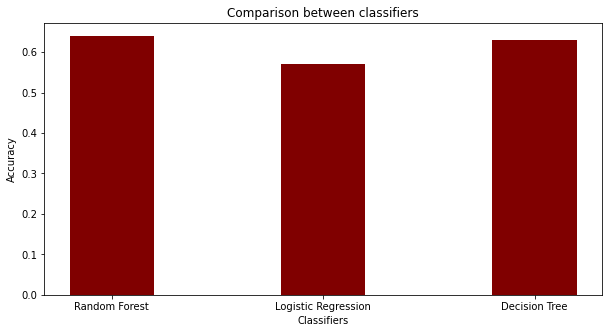

In [296]:
data = {'Random Forest': 0.64, 'Logistic Regression': 0.57, 'Decision Tree': 0.63}
dataset = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dataset, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparison between classifiers")
plt.show()

Indeed, random forest classifier is the best model. We will now use gridsearch to obtain the best random forest model and use it to make predictions of the test data.

In [284]:
from sklearn.model_selection import GridSearchCV

In [285]:
model = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200, 500]})

In [290]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [291]:
best_model = RandomForestClassifier(max_features='sqrt', n_estimators= 50, max_depth=7, criterion='gini')

In [292]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=50)

In [293]:
y_pred = best_model.predict(X_test)

In [294]:
display_results(y_test, y_pred)

Labels: [False  True]
Confusion Matrix:
 [[5053 2920]
 [1458 4375]]
Accuracy: 0.6828914964508185


We were able to increase the accuracy to 68.3% using GridSearchCV. Nice!